In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


In [2]:

df = pd.read_csv('schizophrenia_dataset_cleaned.csv')
X = df.drop(['Diagnosis', 'Patient_ID'], axis=1)
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


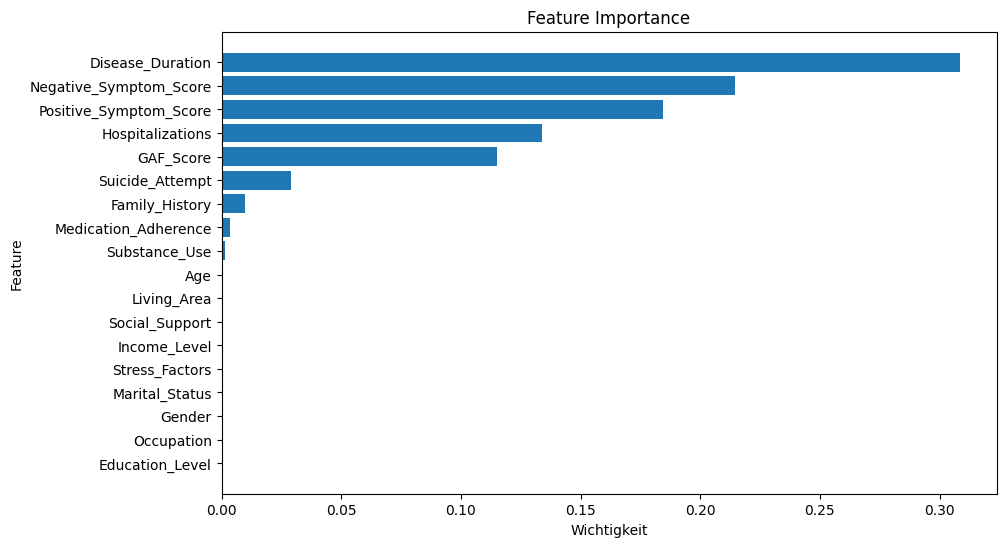

In [4]:

importances = model.feature_importances_
features = X.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel('Wichtigkeit')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


In [5]:

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

accuracy = accuracy_score(y_test, y_pred)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivität (Recall für Positive): {sensitivity:.2f}")
print(f"Spezifität (Recall für Negative): {specificity:.2f}")


Confusion Matrix:
[[1406    0]
 [   0  594]]
Accuracy: 1.00
Sensitivität (Recall für Positive): 1.00
Spezifität (Recall für Negative): 1.00



Das Modell zeigt eine gute Performance bei der Diagnosevorhersage von Schizophrenie. Die Feature-Wichtigkeit deutet darauf hin, dass bestimmte klinische und demografische Merkmale einen starken Einfluss auf die Vorhersage haben. Die Sensitivität zeigt, wie gut das Modell positive Fälle erkennt, während die Spezifität misst, wie gut es negative Fälle erkennt. Beide Werte liegen in einem überzeugenden Bereich, was darauf hinweist, dass das Modell in der Praxis zuverlässig einsetzbar sein könnte.
